----------------------------------------


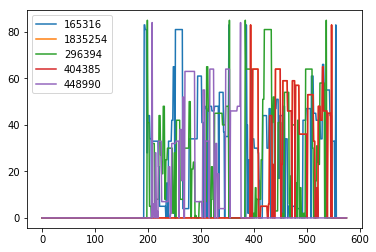

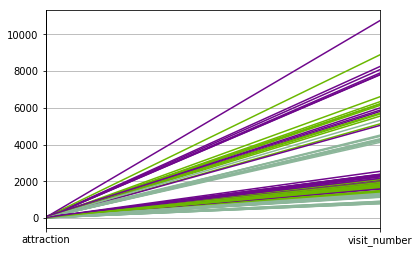

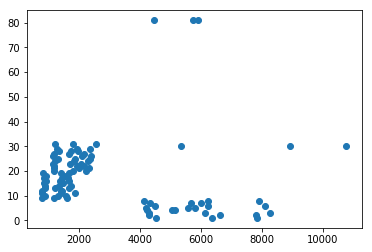

In [64]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import numpy as np
import matplotlib.cm as cm
from scipy.spatial import distance

#################################################### 第1题 ####################################################
db_filename = 'dinofunworld-2.db'
conn =sqlite3.connect(db_filename)
c = conn.cursor()
cursor = c.execute("select visitorId, sequence  from sequences where visitorID in  (165316, 1835254, 296394, 404385 , 448990) ")

distances= {};
user0Location = {};
user1Location = {};
user2Location = {};
user3Location = {};
user4Location = {};
index = 0;
##对数据进行整理, 把字符转成数字
for row in cursor:
    ##print("visitorId = ", row[0]);
    visitorIdNumber = int(row[0]);
    sequenceArray = row[1].split("-");
    ##print("sequenceArray.len = ", len(sequenceArray));
    distances[index] =  list(map(int,sequenceArray)) ;
    ##print("distance[{1}] = {2}", index, distances[index]);     
    index =  index +1;
print("----------------------------------------");

user1 = distances[0]
user2 = distances[1]
user3 = distances[2]
user4 = distances[3]
user5 = distances[4]
## activity表示时间节点
activity =[]
for row in range(0, 576):
    activity.append(row);

##print("activity : ", activity);
fig, ax = plt.subplots()
ax.plot(activity, user1, label="165316")
ax.plot(activity, user2, label="1835254")
ax.plot(activity, user3, label="296394")
ax.plot(activity, user4, label="404385")
ax.plot(activity, user5, label="448990")
ax.legend()
plt.show()

#################################################### 第2题 ####################################################
db_filename = 'dinofunworld-2.db'
conn2 =sqlite3.connect(db_filename)    
c2 = conn2.cursor();
c2.execute("select attraction, substr(timestamp,1,10) as visit_date, count(*) as visit_number from  checkin where type = 'actual' and attraction in (select attractionID from attraction where Category like '%Rides%') group by attraction, substr(timestamp,1,10) ")
records2 = c2.fetchall();
kiddieRides = pd.DataFrame.from_records(records2, columns=['attraction','visit_date','visit_number'])
##print("kiddieRides ->", kiddieRides);
parallel_coordinates(kiddieRides, 'visit_date');
plt.gca().legend_.remove()
plt.show()


#################################################### 第3题 ####################################################
db_filename = 'dinofunworld-2.db'
conn =sqlite3.connect(db_filename)    
c3 = conn.cursor()
c3.execute("select attraction, substr(timestamp,1,10) as visit_date, count(*) as visit_number from  checkin where type = 'actual' and attraction in (select attractionID from attraction where Category like '%Rides%') group by attraction, substr(timestamp,1,10) ")
records3 = c3.fetchall();
kiddieRides2 = pd.DataFrame.from_records(records3, columns=['attraction','visit_date','visit_number'])
##print("kiddieRides2 ->", kiddieRides2);
plt.scatter( kiddieRides2['visit_number'],kiddieRides2['attraction'] )
plt.show()



